In [1]:
import matplotlib.pyplot as plt
import sys
import pickle as pkl
sys.path.append('.')

from DNLutils import *
from scipy.signal import savgol_filter
%matplotlib inline

In [2]:
superhist = "/home/adriansh/work/data/adc/histdataset1.pkl"
with open(superhist, "rb") as f:
    ds = pkl.load(f)

In [3]:
amp = "C10"
adcMax = 2**18
observed = np.zeros(adcMax)
xLowerLim = 26500
measuredCodes = np.arange(xLowerLim, xLowerLim+len(ds[amp]))
observed[measuredCodes] = ds[amp]
expected33 = savgol_filter(observed, 33, 3)
expected65 = savgol_filter(observed, 65, 3)

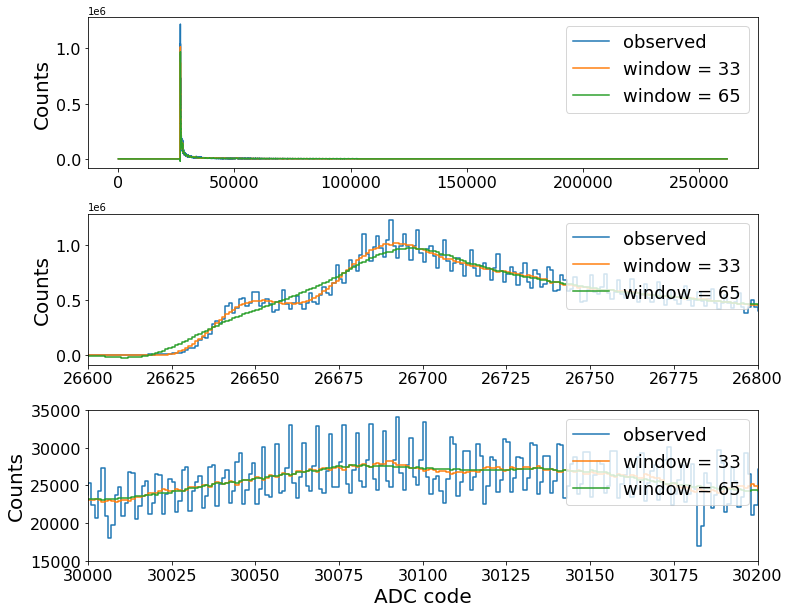

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
for ax in axs.ravel():
    ax.plot(observed, label="observed", ds="steps-post")
    ax.plot(expected33, label="window = 33", ds="steps-post")
    ax.plot(expected65, label="window = 65", ds="steps-post")
    ax.tick_params(labelsize=16)
    ax.set_ylabel("Counts", fontsize=20)
    ax.legend(fontsize=18, loc="upper right")
    
axs[1].set_xlim((26600, 26800))
axs[2].set_xlim((30000, 30200))
axs[2].set_xlabel("ADC code", fontsize=20)
axs[2].set_ylim((15000, 35000))

fig.subplots_adjust(hspace=0.3)
# ax.set_ylim((-200, 200))

plt.show(fig)

In [5]:
xCutoff = 30000
adcBins = buildADCBinsFromDist(observed, expected33, xCutoff=xCutoff)

In [6]:
inl = calculateINL(adcBins)
dnl = calculateDNL(adcBins)
edgeOffset = adcBins[:-1] - np.arange(adcMax)

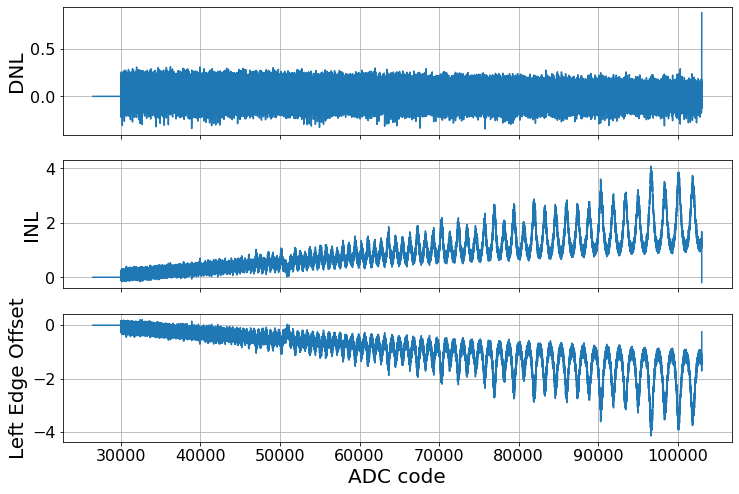

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axs[0].plot(measuredCodes, dnl[measuredCodes])
axs[0].tick_params(labelsize=16)
axs[0].set_ylabel("DNL", fontsize=20)
axs[0].grid(visible=True)

axs[1].plot(measuredCodes, inl[measuredCodes])
axs[1].tick_params(labelsize=16)
axs[2].set_xlabel("ADC code", fontsize=20)
axs[1].set_ylabel("INL", fontsize=20)
axs[1].grid(visible=True)

axs[2].plot(measuredCodes, edgeOffset[measuredCodes])
axs[2].tick_params(labelsize=16)
axs[2].set_ylabel("Left Edge Offset", fontsize=20)
axs[2].grid(visible=True)

plt.show(fig)